# Image Classification Project (MNIST)

This notebook trains and compares two models on **MNIST**:
1. Traditional ML model: **Linear SVM**
2. Deep Learning model: **CNN (Conv2D + MaxPooling + Dropout + Dense)**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
def load_and_preprocess_data(test_size=0.2, random_state=42):
    # Load MNIST from Keras
    (x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

    # Merge and split explicitly into train/test sets
    X = np.concatenate([x_train_raw, x_test_raw], axis=0)
    y = np.concatenate([y_train_raw, y_test_raw], axis=0)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )


    # Normalize pixel values
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Labels for CNN: one-hot encoding
    y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
    y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

    # Flatten for traditional ML model
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Add channel dimension for CNN
    X_train_cnn = np.expand_dims(X_train, axis=-1)
    X_test_cnn = np.expand_dims(X_test, axis=-1)

    return {
        'X_train_flat': X_train_flat,
        'X_test_flat': X_test_flat,
        'X_train_cnn': X_train_cnn,
        'X_test_cnn': X_test_cnn,
        'y_train': y_train,
        'y_test': y_test,
        'y_train_onehot': y_train_onehot,
        'y_test_onehot': y_test_onehot
    }

data = load_and_preprocess_data()

print('Train shape (flat):', data['X_train_flat'].shape)
print('Test shape (flat):', data['X_test_flat'].shape)
print('Train shape (cnn):', data['X_train_cnn'].shape)
print('Test shape (cnn):', data['X_test_cnn'].shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape (flat): (56000, 784)
Test shape (flat): (14000, 784)
Train shape (cnn): (56000, 28, 28, 1)
Test shape (cnn): (14000, 28, 28, 1)


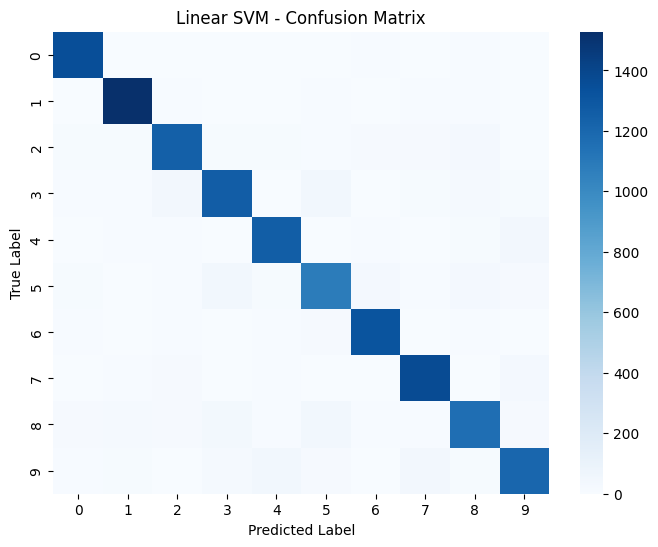

Linear SVM Accuracy: 0.9138


In [3]:
def train_traditional_model(X_train_flat, y_train):
    # Linear SVM as traditional ML baseline
    svm_model = LinearSVC(random_state=42, max_iter=3000)
    svm_model.fit(X_train_flat, y_train)
    return svm_model

def evaluate_model(y_true, y_pred, title):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap='Blues', annot=False, fmt='d')
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(f'{title} Accuracy: {acc:.4f}')
    return acc

svm_model = train_traditional_model(data['X_train_flat'], data['y_train'])
svm_preds = svm_model.predict(data['X_test_flat'])
svm_accuracy = evaluate_model(data['y_test'], svm_preds, 'Linear SVM')


C:\Users\Kalpesh Gangurde\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.8715 - loss: 0.4130 - val_accuracy: 0.9712 - val_loss: 0.0883
Epoch 2/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9584 - loss: 0.1387 - val_accuracy: 0.9796 - val_loss: 0.0656
Epoch 3/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9686 - loss: 0.1027 - val_accuracy: 0.9841 - val_loss: 0.0498
Epoch 4/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9740 - loss: 0.0891 - val_accuracy: 0.9855 - val_loss: 0.0456
Epoch 5/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9771 - loss: 0.0769 - val_accuracy: 0.9873 - val_loss: 0.0415
Epoch 6/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.9796 - loss: 0.0660 - val_accuracy: 0.9875 - val_loss: 0.0380
Epoch 7/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9816 - loss: 0.0598 - val_accuracy: 0.9882 - val_loss: 0.0343
Epoch 8/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9830 - loss: 0.0582 - val_accu

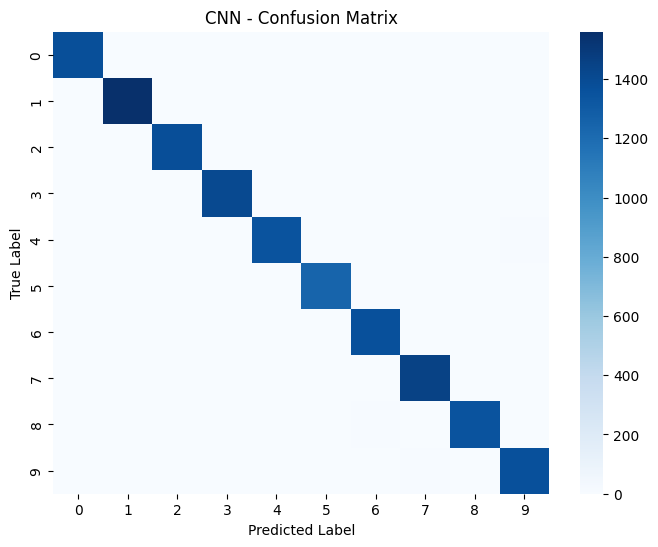

CNN Accuracy: 0.9899


In [4]:
def build_cnn_model(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

cnn_model = build_cnn_model()
cnn_model.summary()

history = cnn_model.fit(
    data['X_train_cnn'],
    data['y_train_onehot'],
    epochs=8,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

cnn_probs = cnn_model.predict(data['X_test_cnn'])
cnn_preds = np.argmax(cnn_probs, axis=1)
cnn_accuracy = evaluate_model(data['y_test'], cnn_preds, 'CNN')


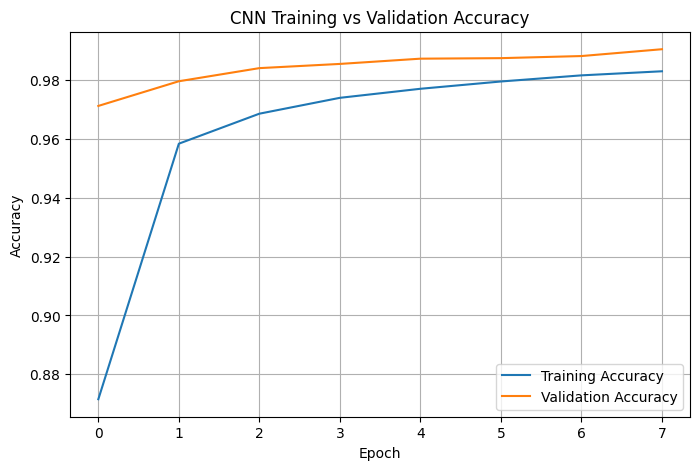

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
print('Model Comparison Summary')
print('-' * 40)
print(f'Linear SVM Test Accuracy: {svm_accuracy:.4f}')
print(f'CNN Test Accuracy:        {cnn_accuracy:.4f}')

if cnn_accuracy > svm_accuracy:
    print('\nBetter Model: CNN')
    print('Reason: CNN captures spatial patterns directly from image structure, which improves image classification performance.')
elif svm_accuracy > cnn_accuracy:
    print('\nBetter Model: Linear SVM')
    print('Reason: For this run, the traditional model generalized better based on test accuracy.')
else:
    print('\nBoth models performed similarly on this split.')


Model Comparison Summary
----------------------------------------
Linear SVM Test Accuracy: 0.9138
CNN Test Accuracy:        0.9899

Better Model: CNN
Reason: CNN captures spatial patterns directly from image structure, which improves image classification performance.
